## Importation des librairies

In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

## Création des circuits 

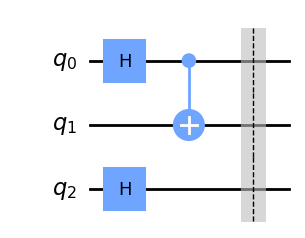

In [5]:
circ = QuantumCircuit(3) # => avec 3 qbits => un par gardiens + 1 pour le mensonge

# Disposition aléatoire du trésor
circ.h(0)
# Porte CNOT de q0 à q1 => pour les gardiens
circ.cx(0,1)
# Disposition du gardien menteur
circ.h(2)
circ.barrier(range(3))
circ.draw('mpl')

## Mensonge et question

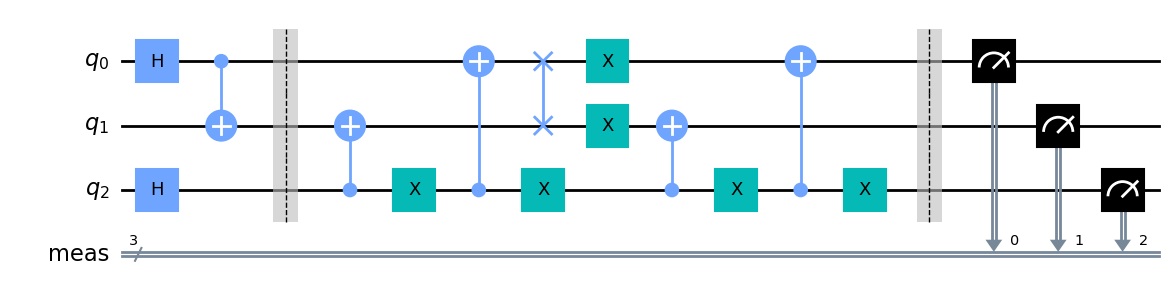

In [6]:
# Initialisation du menteur
circ.cx(2, 1)
circ.x(2)

circ.cx(2,0)
circ.x(2)

# Question
circ.swap(0,1)
circ.x(0)
circ.x(1)

circ.cx(2, 1)
circ.x(2)
circ.cx(2,0)
circ.x(2)

circ.measure_all()
circ.draw("mpl")

## Simulation

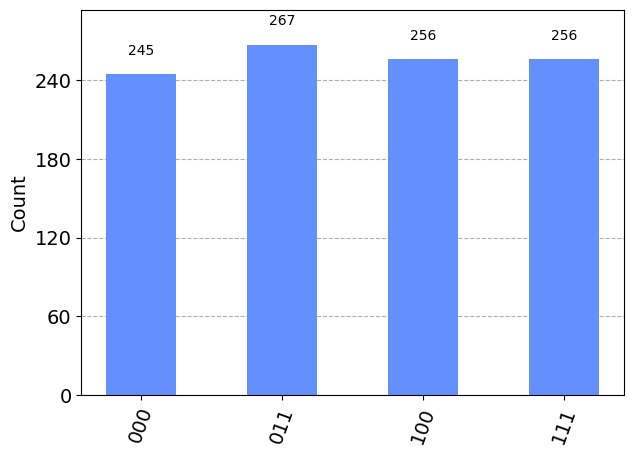

In [9]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Execution du circuit dans le simulateur
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)